# Diabetes Data Train Test Split

## Imports and Setups

In [4]:
%load_ext autoreload
%autoreload 2

# This sets up the appropriate logging and path configs
from notebook_setup import * 

In [5]:
# External Packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

from sklearn.model_selection import train_test_split

## Utils

In [53]:
def plot_split_stratfied_distributions(df_train: pd.DataFrame, df_test: pd.DataFrame, stratify: str) -> None:
    fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)

    df_train[stratify].value_counts().plot(kind="bar", ax=axes[0])
    df_test[stratify].value_counts().plot(kind="bar", ax=axes[1])
    
    plt.plot()

## Import Diabetes Dataset

In [54]:
data = pd.read_csv('data/raw/diabetes_prediction_dataset.csv')
data.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [55]:
# Split by features and labels
X = data.loc[:, data.columns != 'diabetes']
y = data.loc[:, data.columns == 'diabetes']

## Split 
Stratify by: [gender, age, diabetes]

### Stratify Demographics
Lets see if we have enough to stratify by

In [56]:
data["gender"].value_counts()

Female    58552
Male      41430
Other        18
Name: gender, dtype: int64

In [57]:
data["age"].value_counts().min()

36

In [58]:
data["diabetes"].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [59]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, 
    stratify=data[["gender", "diabetes"]])

### Confirm Stratified Split By Eye

In [86]:
def plot_split_stratfied_distributions(
    df_train: pd.DataFrame, df_test: pd.DataFrame, stratify: str,
    title=None) -> None:
    fig, axes = plt.subplots(nrows=2, ncols=1, sharex=True)

    df_train[stratify].value_counts().plot(kind="bar", ax=axes[0])
    df_test[stratify].value_counts().plot(kind="bar", ax=axes[1])
    
    if not title:
        fig.suptitle(f"Train Test Split Stratified by {stratify.title()} Column", fontsize=14)
    
#     axes[0].set_title("Train Data", fontsize=10)
#     axes[1].set_title("Test Data", fontsize=10)
    
    plt.xlabel(stratify.title(), fontsize=14)
    plt.ylabel("y-axis label")
#     plt.plot(x_vals, y_vals, 'r-o', label="Drag curve for Vehicle 1")
#     plt.legend()

#     # Plot point labels
#     plt.text(x+.2, y-1, f"({x} m/s, {y:.2f} N drag)",
#              horizontalalignment="left", rotation=0)
    
    plt.plot()

In [92]:
y_train["diabetes"].value_counts().reset_index()

,index,diabetes
0,0,73200
1,1,6800


<AxesSubplot:xlabel='index', ylabel='diabetes'>

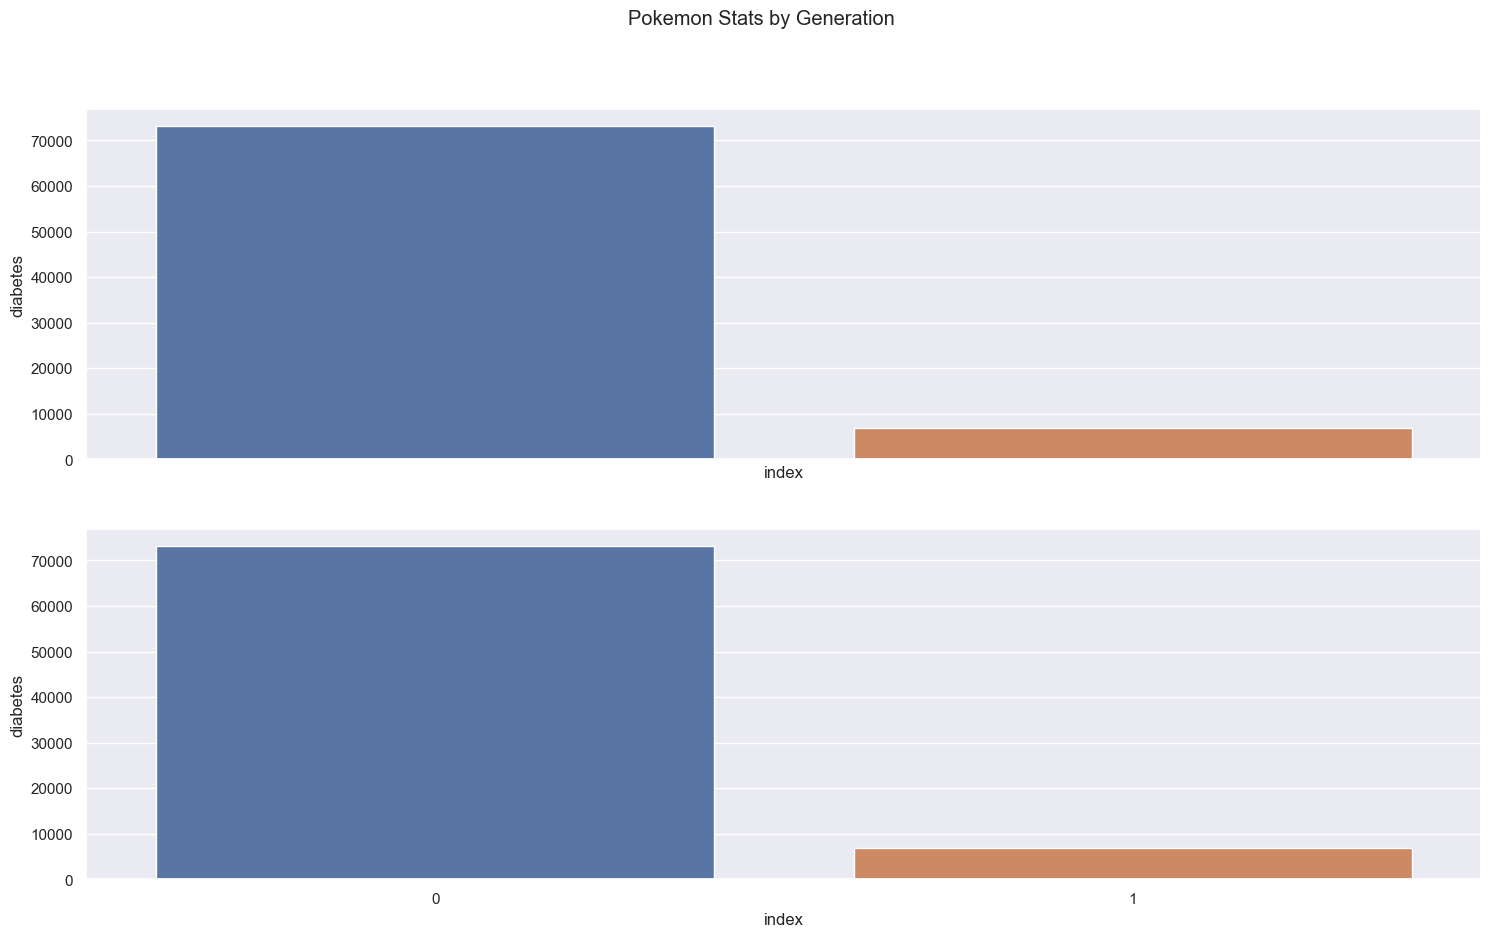

In [110]:
fig, axes = plt.subplots(2, 1, figsize=(18, 10), sharex=True)

fig.suptitle('Pokemon Stats by Generation')

# y_train["diabetes"].value_counts().plot(kind="bar", ax=axes[0])
# y_test["diabetes"].value_counts().plot(kind="bar", ax=axes[1])
sns.barplot(ax=axes[0], data=y_train["diabetes"].value_counts().reset_index(), x="index", y="diabetes")
sns.barplot(ax=axes[1], data=y_train["diabetes"].value_counts().reset_index(), x="index", y="diabetes")

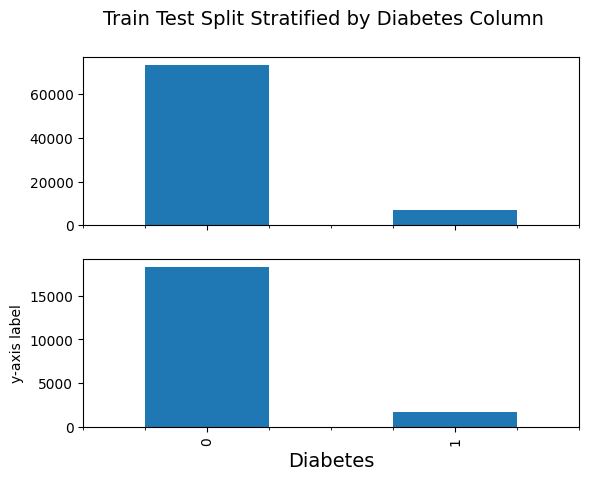

In [87]:
plot_split_stratfied_distributions(y_train, y_test, "diabetes")

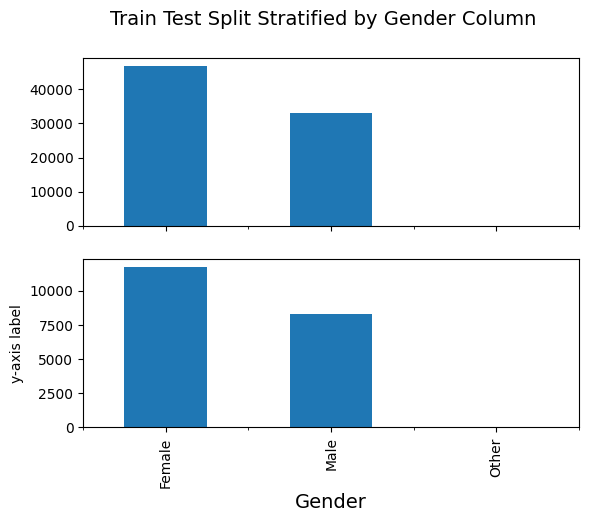

In [88]:
plot_split_stratfied_distributions(X_train, X_test, "gender")

## Output as CSV

In [43]:
df_train = pd.concat([X_train, y_train], axis=1)
df_test = pd.concat([X_test, y_test], axis=1)

In [44]:
df_train.to_csv("data/interim/train.csv")
df_test.to_csv("data/interim/test.csv")